<a href="https://colab.research.google.com/github/rindanh/Latihan-NDSC/blob/main/CVD/Template_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import time
from tqdm.notebook import tqdm
from sklearn.model_selection import StratifiedKFold

### **Bagi data train test (kalo belum ada pembagian)**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/vehicleinsurance/train.csv")

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Response'])
Y = df['Response']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [ ]:
df_train = pd.concat([X_train, Y_train], axis=1)
df_test = pd.concat([X_test, Y_test], axis=1)

### **Siapin data train test (kalo udah ada pembagian)**

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/vehicleinsurance/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/vehicleinsurance/test.csv")
sample = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/vehicleinsurance/sample_submission.csv")

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/archive_9/summer-products-with-rating-and-performance_2020-08.csv")
df_test = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/vehicleinsurance/test.csv")
sample = pd.read_csv("/content/drive/MyDrive/LOMBA/NDSC/vehicleinsurance/sample_submission.csv")

In [ ]:
df_train.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [ ]:
X_train = df_train.drop(columns='Response')
Y_train = df_train.Response

X_test = df_test.copy()

### **Analisis Awal**

In [ ]:
X_train.head().T

,0,1,2,3,4
id,116861,238810,214655,58001,193013
Gender,Male,Female,Male,Male,Female
Age,45,33,22,53,65
Driving_License,1,1,1,1,1
Region_Code,45,28,32,15,8
Previously_Insured,0,0,0,0,0
Vehicle_Age,1-2 Year,> 2 Years,< 1 Year,1-2 Year,1-2 Year
Vehicle_Damage,Yes,Yes,Yes,Yes,No
Annual_Premium,26658,31979,49029,26691,2630
Policy_Sales_Channel,26,124,152,124,26


In [ ]:
X_test.head().T

,0,1,2,3,4
id,200223,49767,172202,160714,53273
Gender,Female,Male,Female,Female,Male
Age,21,55,41,26,51
Driving_License,1,1,1,1,1
Region_Code,3,15,3,11,40
Previously_Insured,1,0,0,0,0
Vehicle_Age,< 1 Year,1-2 Year,1-2 Year,< 1 Year,1-2 Year
Vehicle_Damage,No,Yes,Yes,No,Yes
Annual_Premium,20408,37498,2630,2630,34006
Policy_Sales_Channel,160,26,26,151,124


In [ ]:
desctrain = X_train.describe().T
desctrain

,count,mean,std,min,25%,50%,75%,max
id,190554.0,190456.107775,110045.528346,2.0,95060.50,190250.5,285663.75,381108.0
Age,190554.0,38.885859,15.517128,20.0,25.00,36.0,50.00,85.0
Driving_License,190554.0,0.997827,0.046561,0.0,1.00,1.0,1.00,1.0
Region_Code,190554.0,26.428965,13.193743,0.0,15.00,28.0,35.00,52.0
Previously_Insured,190554.0,0.459219,0.498335,0.0,0.00,0.0,1.00,1.0
Annual_Premium,190554.0,30569.595616,17293.577031,2630.0,24399.25,31675.0,39384.00,540165.0
Policy_Sales_Channel,190554.0,111.864117,54.254809,1.0,26.00,125.0,152.00,163.0
Vintage,190554.0,154.297254,83.724724,10.0,82.00,154.0,227.00,299.0


In [ ]:
desctest = X_test.describe().T
desctest

,count,mean,std,min,25%,50%,75%,max
id,190555.0,190653.891706,109988.336571,1.0,95488.5,190852.0,285995.5,381109.0
Age,190555.0,38.759308,15.505874,20.0,25.0,36.0,49.0,85.0
Driving_License,190555.0,0.997911,0.045654,0.0,1.0,1.0,1.0,1.0
Region_Code,190555.0,26.348650,13.265847,0.0,15.0,28.0,35.0,52.0
Previously_Insured,190555.0,0.457201,0.498166,0.0,0.0,0.0,1.0,1.0
Annual_Premium,190555.0,30559.183574,17132.399796,2630.0,24410.0,31663.0,39419.5,540165.0
Policy_Sales_Channel,190555.0,112.204471,54.152741,1.0,29.0,145.0,152.0,163.0
Vintage,190555.0,154.397539,83.618040,10.0,82.0,154.0,227.0,299.0


In [ ]:
(desctrain - desctest).astype(int)

,count,mean,std,min,25%,50%,75%,max
id,-1,-197,57,1,-428,-601,-331,-1
Age,-1,0,0,0,0,0,1,0
Driving_License,-1,0,0,0,0,0,0,0
Region_Code,-1,0,0,0,0,0,0,0
Previously_Insured,-1,0,0,0,0,0,0,0
Annual_Premium,-1,10,161,0,-10,12,-35,0
Policy_Sales_Channel,-1,0,0,0,-3,-20,0,0
Vintage,-1,0,0,0,0,0,0,0


In [ ]:
def dataset_summary(df) :

    # Buat summary dataframe
    summary_df = pd.DataFrame()

    # Isi summary
    summary_df['Var'] = df.columns
    summary_df['Dtypes'] = df.dtypes.values
    summary_df['Total Missing'] = df.isnull().sum().values
    summary_df['Missing%'] = summary_df['Total Missing'] / len(df) * 100
    summary_df['Total Unique'] = df.nunique().values
    summary_df['Unique%'] = summary_df['Total Unique'] / len(df) * 100

    # Ukuran dataset
    print('Dataset dimension :',df.shape)

    return summary_df

In [ ]:
trainsumm = dataset_summary(X_train)
trainsumm.sort_values(by='Total Unique', ascending=False)

Dataset dimension : (190554, 11)


,Var,Dtypes,Total Missing,Missing%,Total Unique,Unique%
0,id,int64,0,0.0,190554,100.000000
8,Annual_Premium,float64,0,0.0,41066,21.550846
10,Vintage,int64,0,0.0,290,0.152188
9,Policy_Sales_Channel,float64,0,0.0,146,0.076619
2,Age,int64,0,0.0,66,0.034636
4,Region_Code,float64,0,0.0,53,0.027814
6,Vehicle_Age,object,0,0.0,3,0.001574
1,Gender,object,0,0.0,2,0.001050
3,Driving_License,int64,0,0.0,2,0.001050
5,Previously_Insured,int64,0,0.0,2,0.001050


In [ ]:
testsumm = dataset_summary(X_test)
testsumm.sort_values(by='Total Unique', ascending=False)

Dataset dimension : (190555, 11)


,Var,Dtypes,Total Missing,Missing%,Total Unique,Unique%
0,id,int64,0,0.0,190555,100.000000
8,Annual_Premium,float64,0,0.0,41012,21.522395
10,Vintage,int64,0,0.0,290,0.152187
9,Policy_Sales_Channel,float64,0,0.0,152,0.079767
2,Age,int64,0,0.0,66,0.034636
4,Region_Code,float64,0,0.0,53,0.027813
6,Vehicle_Age,object,0,0.0,3,0.001574
1,Gender,object,0,0.0,2,0.001050
3,Driving_License,int64,0,0.0,2,0.001050
5,Previously_Insured,int64,0,0.0,2,0.001050


### **Cek Distribusi Tiap Kolom**
Fungsi: 
- Nentuin kolom mana yg mau di-encoding
- Bantu analisis anomali

In [ ]:
uniquesumm = trainsumm.sort_values(by='Total Unique', ascending=False)
safe_var = uniquesumm[uniquesumm['Total Unique'] <= 300]['Var']

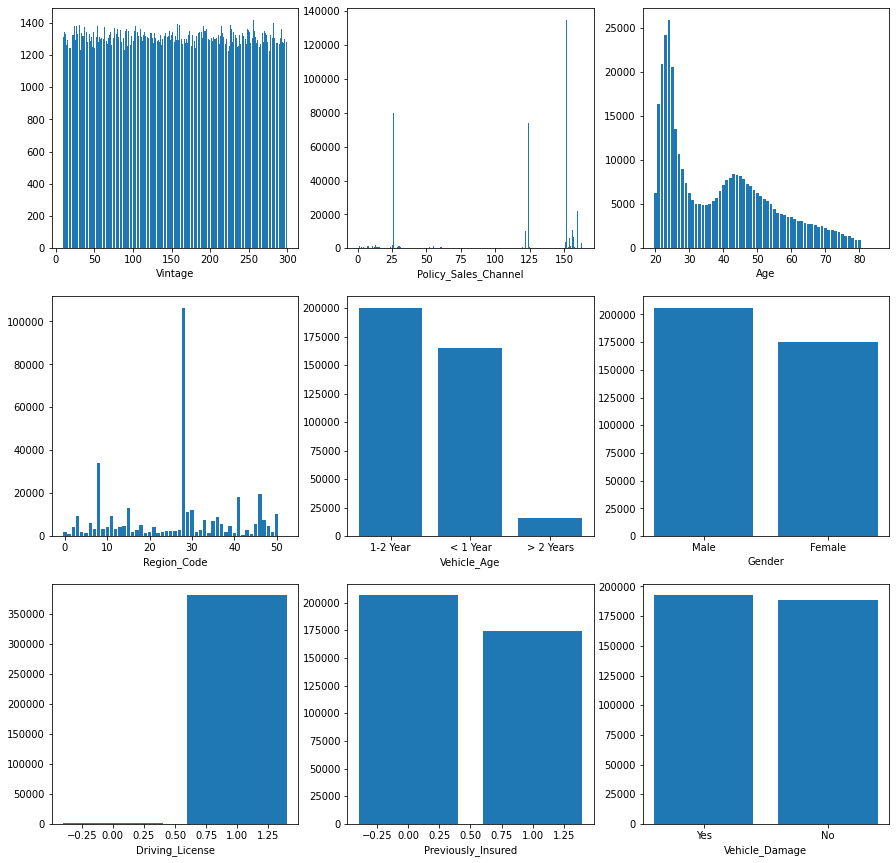

In [ ]:
# Cek distribusi tiap variabel
mpl.rcParams['figure.figsize'] = [15,15]
# plt.style.use('fivethirtyeight') 
# sns.set_style('whitegrid')
grid = mpl.gridspec.GridSpec(3, 3)

var_to_plot = safe_var

for i, var in enumerate(var_to_plot) :
    ax = plt.subplot(grid[i])
    z = df[var].value_counts()
    ax.bar(z.index, z.values)
    ax.set_xlabel(var)

**Predictive Power EDA**

In [ ]:
target_variance = pd.DataFrame([[sv, np.std(df_train.groupby(sv)['Response'].mean().sort_values(ascending=False))] for sv in safe_var])
target_variance.sort_values(by=1, ascending=False)

,0,1
1,Policy_Sales_Channel,0.139553
8,Vehicle_Damage,0.115254
7,Previously_Insured,0.111531
4,Vehicle_Age,0.102106
2,Age,0.069055
6,Driving_License,0.043918
3,Region_Code,0.034292
5,Gender,0.017073
0,Vintage,0.012746


In [ ]:
df_train['Policy_Sales_Channel'].value_counts().head()

152.0    67126
26.0     39992
124.0    37055
160.0    10890
156.0     5209
Name: Policy_Sales_Channel, dtype: int64

In [ ]:
df_train.groupby('Policy_Sales_Channel')['Response'].mean().sort_values(ascending=False)

Policy_Sales_Channel
123.0    1.000000
101.0    1.000000
121.0    0.350000
62.0     0.333333
3.0      0.303846
           ...   
79.0     0.000000
27.0     0.000000
82.0     0.000000
83.0     0.000000
76.0     0.000000
Name: Response, Length: 146, dtype: float64

In [ ]:
Y_train.mean()

0.12146163292295098

In [ ]:
yyy = df_train['Policy_Sales_Channel'].value_counts().head()
zzz = df_train.groupby('Policy_Sales_Channel')['Response'].mean().sort_values(ascending=False)
[[yy, zzz[yy]] for yy in yyy.index]

[[152.0, 0.02829008133957036],
 [26.0, 0.1959391878375675],
 [124.0, 0.18704628255296182],
 [160.0, 0.020110192837465565],
 [156.0, 0.22614705317719333]]

### **Bantu Analisis**

https://colab.research.google.com/drive/1p1T43pkgWwQb8S7SlKDapjAQ6G3a03UE?usp=sharing

In [ ]:
for col in X_train.columns:
    print(X_train[col].value_counts(), '\n------------------\n\n')

2047      1
294950    1
251344    1
208335    1
323939    1
         ..
68773     1
90592     1
138134    1
131989    1
262144    1
Name: id, Length: 190554, dtype: int64 
------------------


Male      103139
Female     87415
Name: Gender, dtype: int64 
------------------


24    12990
23    12082
22    10474
25    10269
21     8128
      ...  
81       26
82       13
83        7
84        5
85        3
Name: Age, Length: 66, dtype: int64 
------------------


1    190140
0       414
Name: Driving_License, dtype: int64 
------------------


28.0    53417
8.0     16670
46.0     9931
41.0     9192
15.0     6664
30.0     6125
29.0     5555
50.0     5042
3.0      4597
11.0     4562
36.0     4341
33.0     3906
47.0     3661
35.0     3454
6.0      3134
45.0     2785
37.0     2707
18.0     2528
14.0     2376
48.0     2365
39.0     2362
10.0     2172
21.0     2143
13.0     2013
2.0      1985
7.0      1624
12.0     1600
9.0      1544
27.0     1447
32.0     1371
43.0     1317
26.0     1307
17.0

### **Bagi Train-Val**

In [ ]:
X_tr, X_te, Y_tr, Y_te = train_test_split(X_train, Y_train, test_size=0.5, random_state=42)

### **Label Encoding**

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

X_tr.reset_index(drop=True, inplace=True)
Y_tr.reset_index(drop=True, inplace=True)

X_te.reset_index(drop=True, inplace=True)
Y_te.reset_index(drop=True, inplace=True)

In [ ]:
# Praproses (jika ada)
X_tr_factorized = X_tr.copy()
X_te_factorized = X_te.copy()

# Buat df untuk akses ke 'Response'
df_tr_factorized = pd.concat([X_tr_factorized, Y_tr], axis=1)
df_te_factorized = pd.concat([X_te_factorized, Y_te], axis=1)

In [ ]:
# Difaktorisasi
to_factorize_cols = ['Gender', 'Vehicle_Damage']
for col in to_factorize_cols:
    X_tr_factorized[col] = pd.factorize(X_tr[col], sort=True)[0]
    X_te_factorized[col] = pd.factorize(X_te[col], sort=True)[0]

# Post-proses
X_tr_factorized['Vehicle_Age'] = X_tr_factorized['Vehicle_Age'].replace({'< 1 Year':0,
                                                                         '1-2 Year':1,
                                                                         '> 2 Years':2})
X_te_factorized['Vehicle_Age'] = X_te_factorized['Vehicle_Age'].replace({'< 1 Year':0,
                                                                         '1-2 Year':1,
                                                                         '> 2 Years':2})

In [ ]:
# # Bulan jadi kategori numerik
# month_replace = {'January':1, 
#                  'February':2, 
#                  'March':3, 
#                  'April':4,
#                  'May':5,
#                  'June':6,
#                  'July':7,
#                  'August':8,
#                  'September':9,
#                  'October':10,
#                  'November':11,
#                  'December':12}
# X_tr_factorized['arrival_date_month'] = X_tr_factorized['arrival_date_month'].replace(month_replace)
# X_te_factorized['arrival_date_month'] = X_te_factorized['arrival_date_month'].replace(month_replace)


# Hapus kolom yg missing > 30%
trainsumm = dataset_summary(X_tr)
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_tr_factorized = X_tr_factorized.drop(columns=to_delete)
X_te_factorized = X_te_factorized.drop(columns=to_delete)


# Hapus kolom yg terlalu banyak unik tapi tidak numerik
to_delete_unique = ['id', 'Policy_Sales_Channel', 'Region_Code']
X_tr_factorized = X_tr_factorized.drop(columns=to_delete_unique)
X_te_factorized = X_te_factorized.drop(columns=to_delete_unique)

Dataset dimension : (95277, 11)


### **Mean Encoding (alpha)**

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

X_tr.reset_index(drop=True, inplace=True)
Y_tr.reset_index(drop=True, inplace=True)

X_te.reset_index(drop=True, inplace=True)
Y_te.reset_index(drop=True, inplace=True)

In [ ]:
# Praproses (jika ada)
X_tr_encoded = X_tr.copy()
X_te_encoded = X_te.copy()

X_tr_encoded[~X_tr_encoded['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0
X_te_encoded[~X_te_encoded['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0

# Buat df untuk akses ke 'Response'
df_tr_encoded = pd.concat([X_tr_encoded, Y_tr], axis=1)
df_te_encoded = pd.concat([X_te_encoded, Y_te], axis=1)

In [ ]:
# Di mean encoding
to_mean_encode = ['Policy_Sales_Channel', 'Gender', 'Vehicle_Age', 'Vehicle_Damage']
for col in to_mean_encode:

    alpha = 10
    means_global = df_tr_encoded['Response'].mean()
    nrows_cat = df_tr_encoded.groupby(col)['Response'].count()
    means_cat = df_tr_encoded.groupby(col)['Response'].mean()
    means_cats_adj = (means_cat*nrows_cat + means_global*alpha) / (nrows_cat+alpha)

    X_tr_encoded[col] = X_tr_encoded[col].map(means_cats_adj)
    X_te_encoded[col] = X_te_encoded[col].map(means_cats_adj)

X_tr_encoded[to_mean_encode] = X_tr_encoded[to_mean_encode].astype('float64')
X_te_encoded[to_mean_encode] = X_te_encoded[to_mean_encode].astype('float64')

In [ ]:
# # Bulan jadi kategori numerik
# month_replace = {'January':1, 
#                  'February':2, 
#                  'March':3, 
#                  'April':4,
#                  'May':5,
#                  'June':6,
#                  'July':7,
#                  'August':8,
#                  'September':9,
#                  'October':10,
#                  'November':11,
#                  'December':12}
# X_tr_encoded['arrival_date_month'] = X_tr_encoded['arrival_date_month'].replace(month_replace)
# X_te_encoded['arrival_date_month'] = X_te_encoded['arrival_date_month'].replace(month_replace)


# Hapus kolom yg missing > 30%
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_tr_encoded = X_tr_encoded.drop(columns=to_delete)
X_te_encoded = X_te_encoded.drop(columns=to_delete)


# Hapus kolom yg terlalu banyak unik tapi tidak numerik
to_delete_unique = ['id', 'Region_Code']
X_tr_encoded = X_tr_encoded.drop(columns=to_delete_unique)
X_te_encoded = X_te_encoded.drop(columns=to_delete_unique)

### **Mean Encoding (alpha + CV)**

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

X_tr.reset_index(drop=True, inplace=True)
Y_tr.reset_index(drop=True, inplace=True)

X_te.reset_index(drop=True, inplace=True)
Y_te.reset_index(drop=True, inplace=True)

In [ ]:
# Praproses (jika ada)
X_tr_encoded_cv = X_tr.copy()
X_te_encoded_cv = X_te.copy()

X_tr_encoded_cv[~X_tr_encoded_cv['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0
X_te_encoded_cv[~X_te_encoded_cv['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0

# Buat df untuk akses ke 'Response'
df_tr_encoded_cv = pd.concat([X_tr_encoded_cv, Y_tr], axis=1)
df_te_encoded_cv = pd.concat([X_te_encoded_cv, Y_te], axis=1)

In [ ]:
# Di mean encoding CV
to_mean_encode_cv = ['Policy_Sales_Channel', 'Gender', 'Vehicle_Age', 'Vehicle_Damage']
for col in to_mean_encode_cv:

    alpha = 10
    means_global = df_tr_encoded_cv['Response'].mean()
    nrows_cat = df_tr_encoded_cv.groupby(col)['Response'].count()
    means_cat = df_tr_encoded_cv.groupby(col)['Response'].mean()
    means_cats_adj = (means_cat*nrows_cat + means_global*alpha) / (nrows_cat+alpha)

    X_te_encoded_cv[col] = X_te_encoded_cv[col].map(means_cats_adj) # Test pake target global aja


    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=28112020)     
    for tr_ind, val_ind in skf.split(X_tr_encoded_cv, Y_tr):

        # divide data
        df_for_estimation, df_estimated = df_tr_encoded_cv.loc[tr_ind], df_tr_encoded_cv.iloc[val_ind]

        # getting means on data for estimation (all folds except estimated)
        nrows_cat = df_for_estimation.groupby(col)['Response'].count()
        means_cat = df_for_estimation.groupby(col)['Response'].mean()
        means_cats_adj = (means_cat*nrows_cat + means_global*alpha) / (nrows_cat+alpha)

        # Mapping means to estimated fold
        X_tr_encoded_cv[col].loc[val_ind] = df_estimated[col].map(means_cats_adj)


X_tr_encoded_cv[to_mean_encode_cv] = X_tr_encoded_cv[to_mean_encode_cv].astype('float64')
X_te_encoded_cv[to_mean_encode_cv] = X_te_encoded_cv[to_mean_encode_cv].astype('float64')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
# # Bulan jadi kategori numerik
# month_replace = {'January':1, 
#                  'February':2, 
#                  'March':3, 
#                  'April':4,
#                  'May':5,
#                  'June':6,
#                  'July':7,
#                  'August':8,
#                  'September':9,
#                  'October':10,
#                  'November':11,
#                  'December':12}
# X_tr_encoded_cv['arrival_date_month'] = X_tr_encoded_cv['arrival_date_month'].replace(month_replace)
# X_te_encoded_cv['arrival_date_month'] = X_te_encoded_cv['arrival_date_month'].replace(month_replace)


# Hapus kolom yg missing > 30%
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_tr_encoded_cv = X_tr_encoded_cv.drop(columns=to_delete)
X_te_encoded_cv = X_te_encoded_cv.drop(columns=to_delete)


# Hapus kolom yg terlalu banyak unik tapi tidak numerik
to_delete_unique = ['id', 'Region_Code']
X_tr_encoded_cv = X_tr_encoded_cv.drop(columns=to_delete_unique)
X_te_encoded_cv = X_te_encoded_cv.drop(columns=to_delete_unique)

### **XGBoost**

In [ ]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor

from sklearn.model_selection import StratifiedKFold # Classifier
from sklearn.model_selection import KFold # Regressor

#Metrics
from sklearn.metrics import matthews_corrcoef # Classifier
from sklearn.metrics import mean_squared_error # Regressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### **Validation**

**Validation (Label Encoding)**

In [ ]:
#@title
X_tr_factorized.reset_index(drop=True, inplace=True)
Y_tr.reset_index(drop=True, inplace=True)

rand_states = [28112020]
rand_scores_tr = {}
rand_scores_val = {}

for r in rand_states:
    scores_tr = []
    scores_val = []

    skf = StratifiedKFold(n_splits=2, random_state=r, shuffle=True) # Classification
    # kf = KFold(n_splits=2) # Regression

    for train_index, val_index in skf.split(X_tr_factorized, Y_tr): # Classification
    # for train_index, val_index in kf.split(X_tr_factorized): # Regression
        model = XGBClassifier(random_state=1234) # Classification
        # model = XGBRegressor(random_state=1234) # Regression
        model.fit(X_tr_factorized.loc[train_index], Y_tr.loc[train_index])

        # Scoring pake matthew coefficient
        Y_predtrain = model.predict(X_tr_factorized.loc[train_index])
        Y_pred = model.predict(X_tr_factorized.loc[val_index])
        scores_tr.append(mean_squared_error(Y_tr.loc[train_index], Y_predtrain, squared=False))
        scores_val.append(mean_squared_error(Y_tr.loc[val_index], Y_pred, squared=False))

    rand_scores_tr[r] = scores_tr
    rand_scores_val[r] = scores_val

    print(r, "Train", scores_tr)
    print(r, "Val  ", scores_val)
    print('----Baseline----')

print("Train: ", np.array(list(rand_scores_tr.values())).mean())
print("Val  : ",np.array(list(rand_scores_val.values())).mean())

In [ ]:
model = XGBClassifier(random_state=1234) # Classification
model.fit(X_tr_factorized, Y_tr)

Y_predtrain = model.predict(X_tr_factorized)
Y_pred = model.predict(X_te_factorized)

scores_tr = matthews_corrcoef(Y_tr, Y_predtrain)
scores_val = matthews_corrcoef(Y_te, Y_pred)

print('----Baseline----')

print("Train: ", scores_tr)
print("Val  : ", scores_val)

----Baseline----
Train:  0.019440807344107542
Val  :  -0.002081903506589686


**Validation (Mean Encoding + alpha)**

In [ ]:
#@title
X_train_encoded.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

rand_states = [28112020]
rand_scores_train = {}
rand_scores_val = {}

for r in rand_states:
    scores_train = []
    scores_val = []

    # skf = StratifiedKFold(n_splits=2, random_state=r, shuffle=True) # Classification
    skf = StratifiedKFold(n_splits=2, random_state=r, shuffle=True) # Regression
    kf = KFold(n_splits=2)

    # for train_index, test_index in skf.split(X_train_encoded, Y_train):
    for train_index, test_index in kf.split(X_train_encoded):
        model = XGBRegressor(random_state=1234)
        model.fit(X_train_encoded.loc[train_index], Y_train.loc[train_index])

        # Scoring pake matthew coefficient
        Y_predtrain = model.predict(X_train_encoded.loc[train_index])
        Y_pred = model.predict(X_train_encoded.loc[test_index])
        scores_train.append(mean_squared_error(Y_train.loc[train_index], Y_predtrain, squared=False))
        scores_val.append(mean_squared_error(Y_train.loc[test_index], Y_pred, squared=False))

    rand_scores_train[r] = scores_train
    rand_scores_val[r] = scores_val

    print(r, "Train", scores_train)
    print(r, "Test ", scores_val)
    print('----Baseline----')

print("Train: ", np.array(list(rand_scores_train.values())).mean())
print("Test : ",np.array(list(rand_scores_val.values())).mean())

In [ ]:
model = XGBClassifier(random_state=1234) # Classification
model.fit(X_tr_encoded, Y_tr)

Y_predtrain = model.predict(X_tr_encoded)
Y_pred = model.predict(X_te_encoded)

scores_tr = matthews_corrcoef(Y_tr, Y_predtrain)
scores_val = matthews_corrcoef(Y_te, Y_pred)

print('----Mean Encoding + Alpha----')

print("Train: ", scores_tr)
print("Val  : ", scores_val)

----Mean Encoding + Alpha----
Train:  0.01725417135141857
Val  :  0.0053246641737706045


**Validation (Mean Encoding CV + alpha)**

In [ ]:
#@title
X_train_encoded_cv.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

rand_states = [28112020]
rand_scores_train = {}
rand_scores_val = {}

for r in rand_states:
    scores_train = []
    scores_val = []

    # skf = StratifiedKFold(n_splits=2, random_state=r, shuffle=True) # Classification
    skf = StratifiedKFold(n_splits=2, random_state=r, shuffle=True) # Regression
    kf = KFold(n_splits=2)

    # for train_index, test_index in skf.split(X_train_encoded_cv, Y_train):
    for train_index, test_index in kf.split(X_train_encoded_cv):
        model = XGBRegressor(random_state=1234)
        model.fit(X_train_encoded_cv.loc[train_index], Y_train.loc[train_index])

        # Scoring pake matthew coefficient
        Y_predtrain = model.predict(X_train_encoded_cv.loc[train_index])
        Y_pred = model.predict(X_train_encoded_cv.loc[test_index])
        scores_train.append(mean_squared_error(Y_train.loc[train_index], Y_predtrain, squared=False))
        scores_val.append(mean_squared_error(Y_train.loc[test_index], Y_pred, squared=False))

    rand_scores_train[r] = scores_train
    rand_scores_val[r] = scores_val

    print(r, "Train", scores_train)
    print(r, "Test ", scores_val)
    print('----Baseline----')

print("Train: ", np.array(list(rand_scores_train.values())).mean())
print("Test : ",np.array(list(rand_scores_val.values())).mean())

In [ ]:
model = XGBClassifier(random_state=1234) # Classification
model.fit(X_tr_encoded_cv, Y_tr)

Y_predtrain = model.predict(X_tr_encoded_cv)
Y_pred = model.predict(X_te_encoded_cv)

scores_tr = matthews_corrcoef(Y_tr, Y_predtrain)
scores_val = matthews_corrcoef(Y_te, Y_pred)

print('----Mean Encoding + CV + Alpha----')

print("Train: ", scores_tr)
print("Val  : ", scores_val)

----Mean Encoding + CV + Alpha----
Train:  0.019879790066312127
Val  :  0.0053246641737706045


### **Submit**

In [ ]:
X_train_factorized.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBClassifier(random_state=1234)
model.fit(X_train_factorized, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_factorized)
Y_pred.to_csv('')

Baseline: 0.6645578040144313
Mean Encoding: 0.6747142800755542
Mean Encoding CV: 0.6768000304800589


In [ ]:
X_train_encoded.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBClassifier(random_state=1234)
model.fit(X_train_encoded, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_encoded)
Y_pred.to_csv('')

In [ ]:
X_train_encoded_cv.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBClassifier(random_state=1234)
model.fit(X_train_encoded_cv, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_encoded_cv)
Y_pred.to_csv('')

### **Test**

**Test (Label Encoding)**

In [ ]:
# Praproses (jika ada)
X_train_factorized = X_train.copy()
X_test_factorized = X_test.copy()

# Buat df untuk akses ke 'Response'
df_train_factorized = pd.concat([X_train_factorized, Y_train], axis=1)
df_test_factorized = pd.concat([X_test_factorized, Y_test], axis=1)


# Difaktorisasi
to_factorize_cols = ['Gender', 'Vehicle_Damage']
for col in to_factorize_cols:
    X_train_factorized[col] = pd.factorize(X_train[col], sort=True)[0]
    X_test_factorized[col] = pd.factorize(X_test[col], sort=True)[0]

# Post-proses
X_train_factorized['Vehicle_Age'] = X_train_factorized['Vehicle_Age'].replace({'< 1 Year':0,
                                                                         '1-2 Year':1,
                                                                         '> 2 Years':2})
X_test_factorized['Vehicle_Age'] = X_test_factorized['Vehicle_Age'].replace({'< 1 Year':0,
                                                                         '1-2 Year':1,
                                                                         '> 2 Years':2})


# Hapus kolom yg missing > 30%
trainsumm = dataset_summary(X_train)
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_train_factorized = X_train_factorized.drop(columns=to_delete)
X_test_factorized = X_test_factorized.drop(columns=to_delete)

# Hapus kolom yg terlalu banyak unik tapi tidak numerik
to_delete_unique = ['id', 'Policy_Sales_Channel', 'Region_Code']
X_train_factorized = X_train_factorized.drop(columns=to_delete_unique)
X_test_factorized = X_test_factorized.drop(columns=to_delete_unique)

Dataset dimension : (190554, 11)


In [ ]:
model = XGBClassifier(random_state=1234) # Classification
model.fit(X_train_factorized, Y_train)

Y_predtrain = model.predict(X_train_factorized)
Y_pred = model.predict(X_test_factorized)

scores_train = matthews_corrcoef(Y_train, Y_predtrain)
scores_val = matthews_corrcoef(Y_test, Y_pred)

print('----Label Encoding----')

print("Train: ", scores_train)
print("Val  : ", scores_val)

----Mean Encoding + CV + Alpha----
Train:  0.0
Val  :  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


**Test (Mean Encode + Alpha)**

In [ ]:
# Praproses (jika ada)
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

X_train_encoded[~X_train_encoded['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0
X_test_encoded[~X_test_encoded['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0

# Buat df untuk akses ke 'Response'
df_train_encoded = pd.concat([X_train_encoded, Y_train], axis=1)
df_test_encoded = pd.concat([X_test_encoded, Y_test], axis=1)


# Di mean encoding
to_mean_encode = ['Policy_Sales_Channel', 'Gender', 'Vehicle_Age', 'Vehicle_Damage']
for col in to_mean_encode:

    alpha = 10
    means_global = df_train_encoded['Response'].mean()
    nrows_cat = df_train_encoded.groupby(col)['Response'].count()
    means_cat = df_train_encoded.groupby(col)['Response'].mean()
    means_cats_adj = (means_cat*nrows_cat + means_global*alpha) / (nrows_cat+alpha)

    X_train_encoded[col] = X_train_encoded[col].map(means_cats_adj)
    X_test_encoded[col] = X_test_encoded[col].map(means_cats_adj)

X_train_encoded[to_mean_encode] = X_train_encoded[to_mean_encode].astype('float64')
X_test_encoded[to_mean_encode] = X_test_encoded[to_mean_encode].astype('float64')


# Hapus kolom yg missing > 30%
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_train_encoded = X_train_encoded.drop(columns=to_delete)
X_test_encoded = X_test_encoded.drop(columns=to_delete)

# Hapus kolom yg terlalu banyak unik tapi tidak numerik
to_delete_unique = ['id', 'Region_Code']
X_train_encoded = X_train_encoded.drop(columns=to_delete_unique)
X_test_encoded = X_test_encoded.drop(columns=to_delete_unique)

In [ ]:
model = XGBClassifier(random_state=1234) # Classification
model.fit(X_train_encoded, Y_train)

Y_predtrain = model.predict(X_train_encoded)
Y_pred = model.predict(X_test_encoded)

scores_train = matthews_corrcoef(Y_train, Y_predtrain)
scores_val = matthews_corrcoef(Y_test, Y_pred)

print('----Mean Encoding + Alpha----')

print("Train: ", scores_train)
print("Val  : ", scores_val)

----Mean Encoding + CV + Alpha----
Train:  0.010544196449169799
Val  :  0.017107671153308964


**Test (Mean Encode + Alpha + CV)**

In [ ]:
# Praproses (jika ada)
X_train_encoded_cv = X_train.copy()
X_test_encoded_cv = X_test.copy()

X_train_encoded_cv[~X_train_encoded_cv['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0
X_test_encoded_cv[~X_test_encoded_cv['Policy_Sales_Channel'].isin([152.0, 26.0, 124.0, 160.0])] = 999.0

# Buat df untuk akses ke 'Response'
df_train_encoded_cv = pd.concat([X_train_encoded_cv, Y_train], axis=1)
df_test_encoded_cv = pd.concat([X_test_encoded_cv, Y_test], axis=1)


# Di mean encoding CV
to_mean_encode_cv = ['Policy_Sales_Channel', 'Gender', 'Vehicle_Age', 'Vehicle_Damage']
for col in to_mean_encode_cv:

    alpha = 10
    means_global = df_train_encoded_cv['Response'].mean()
    nrows_cat = df_train_encoded_cv.groupby(col)['Response'].count()
    means_cat = df_train_encoded_cv.groupby(col)['Response'].mean()
    means_cats_adj = (means_cat*nrows_cat + means_global*alpha) / (nrows_cat+alpha)

    X_test_encoded_cv[col] = X_test_encoded_cv[col].map(means_cats_adj) # Test pake target global aja


    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=28112020)     
    for tr_ind, val_ind in skf.split(X_train_encoded_cv, Y_train):

        # divide data
        df_for_estimation, df_estimated = df_train_encoded_cv.loc[tr_ind], df_train_encoded_cv.iloc[val_ind]

        # getting means on data for estimation (all folds except estimated)
        nrows_cat = df_for_estimation.groupby(col)['Response'].count()
        means_cat = df_for_estimation.groupby(col)['Response'].mean()
        means_cats_adj = (means_cat*nrows_cat + means_global*alpha) / (nrows_cat+alpha)

        # Mapping means to estimated fold
        X_train_encoded_cv[col].loc[val_ind] = df_estimated[col].map(means_cats_adj)


X_train_encoded_cv[to_mean_encode_cv] = X_train_encoded_cv[to_mean_encode_cv].astype('float64')
X_test_encoded_cv[to_mean_encode_cv] = X_test_encoded_cv[to_mean_encode_cv].astype('float64')


# Hapus kolom yg missing > 30%
to_delete = trainsumm[trainsumm['Missing%'] >= 30]['Var']
X_train_encoded_cv = X_train_encoded_cv.drop(columns=to_delete)
X_test_encoded_cv = X_test_encoded_cv.drop(columns=to_delete)


# Hapus kolom yg terlalu banyak unik tapi tidak numerik
to_delete_unique = ['id', 'Region_Code']
X_train_encoded_cv = X_train_encoded_cv.drop(columns=to_delete_unique)
X_test_encoded_cv = X_test_encoded_cv.drop(columns=to_delete_unique)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
model = XGBClassifier(random_state=1234) # Classification
model.fit(X_train_encoded_cv, Y_train)

Y_predtrain = model.predict(X_train_encoded_cv)
Y_pred = model.predict(X_test_encoded_cv)

scores_train = matthews_corrcoef(Y_train, Y_predtrain)
scores_val = matthews_corrcoef(Y_test, Y_pred)

print('----Mean Encoding + Alpha----')

print("Train: ", scores_train)
print("Val  : ", scores_val)

----Mean Encoding + Alpha----
Train:  0.006795195606424971
Val  :  0.0037035909231529517


In [ ]:
X_train_factorized.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBRegressor(random_state=1234)
model.fit(X_train_factorized, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_factorized)
print("Baseline:", mean_squared_error(Y_test, Y_pred, squared=False))



X_train_encoded.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBRegressor(random_state=1234)
model.fit(X_train_encoded, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_encoded)
print("Mean Encoding:", mean_squared_error(Y_test, Y_pred, squared=False))



X_train_encoded_cv.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)

model = XGBRegressor(random_state=1234)
model.fit(X_train_encoded_cv, Y_train)

# Scoring pake matthew coefficient
Y_pred = model.predict(X_test_encoded_cv)
print("Mean Encoding CV:", mean_squared_error(Y_test, Y_pred, squared=False))

[15:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Baseline: 517.1187877608266
[15:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Encoding: 502.62569150384604
[15:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Encoding CV: 500.7945022102557
